# PV_Live Dataset: Anomaly Detection and Time Series Analysis
This notebook demonstrates anomaly detection and time series analysis on the PV_Live dataset.

# Import Libraries

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")


# Load the dataset

In [3]:
file_path = 'PV_Live Historical Results.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Head:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gsp_id                 17568 non-null  int64  
 1   datetime_gmt           17568 non-null  object 
 2   generation_mw          17568 non-null  float64
 3   lcl_mw                 17566 non-null  float64
 4   ucl_mw                 17566 non-null  float64
 5   installedcapacity_mwp  17568 non-null  float64
 6   capacity_mwp           17568 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 960.9+ KB
None

Dataset Head:
   gsp_id          datetime_gmt  generation_mw  lcl_mw  ucl_mw  \
0       0  2024-01-01T23:30:00Z            0.0     0.0     0.0   
1       0  2024-01-01T23:00:00Z            0.0     0.0     0.0   
2       0  2024-01-01T22:30:00Z            0.0     0.0     0.0   
3       0  2024-01-01T22:00:00Z            0.0     0.0     0.0

# Data Preprocessing

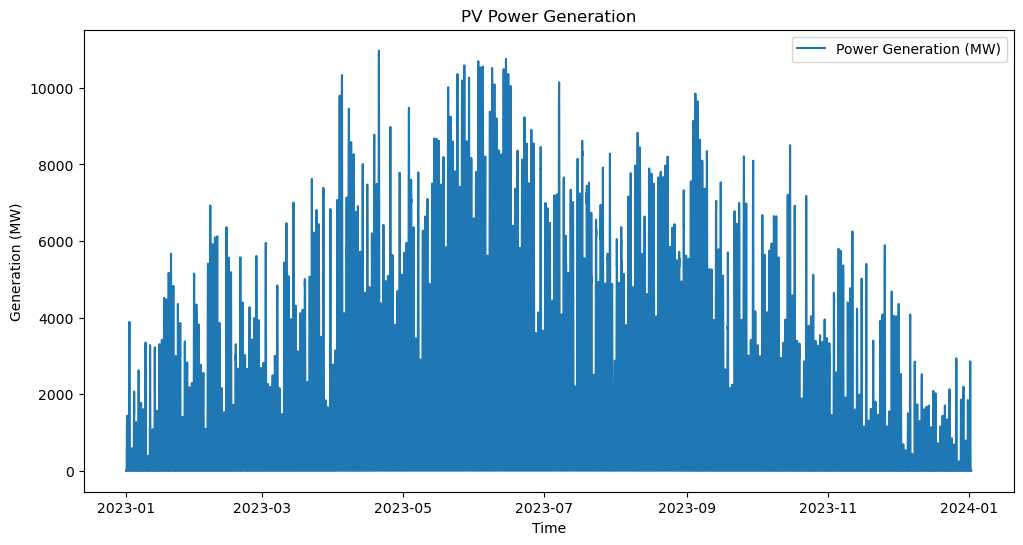

In [4]:
# Convert the datetime_gmt column to pandas datetime format
df['datetime_gmt'] = pd.to_datetime(df['datetime_gmt'])

# Set the datetime_gmt column as the index
df.set_index('datetime_gmt', inplace=True)

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Use 'generation_mw' as the column with power generation values
generation = df['generation_mw']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(generation, label='Power Generation (MW)')
plt.title('PV Power Generation')
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.legend()
plt.show()

# Anomaly Detection using Isolation Forest

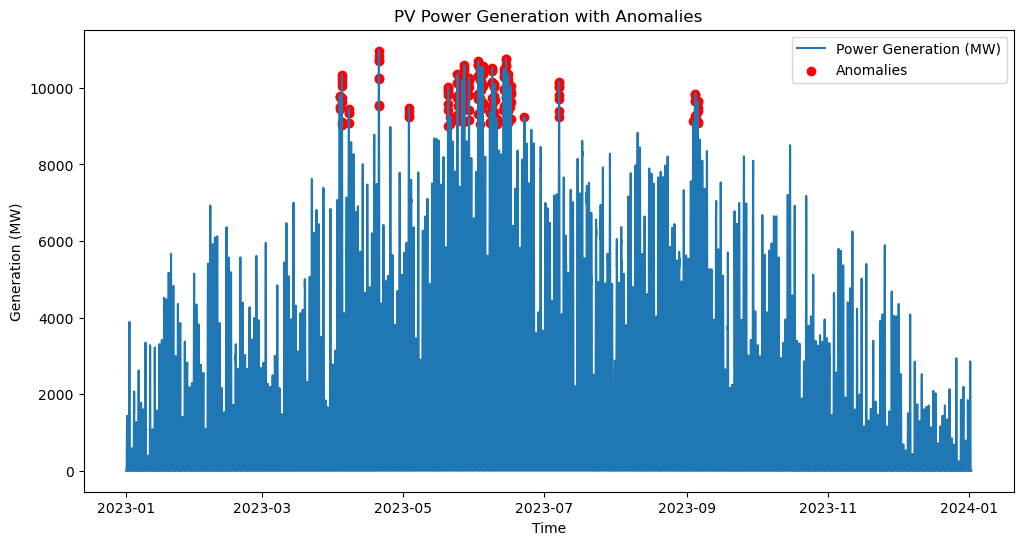

In [5]:
# Prepare the data for modeling
scaler = StandardScaler()
generation_scaled = scaler.fit_transform(generation.values.reshape(-1, 1))

# Train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)  # Assuming 1% of data is anomalous
df['anomaly_score'] = iso_forest.fit_predict(generation_scaled)

# Extract anomalies
anomalies = df[df['anomaly_score'] == -1]

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(generation, label='Power Generation (MW)')
plt.scatter(anomalies.index, anomalies['generation_mw'], color='red', label='Anomalies')
plt.title('PV Power Generation with Anomalies')
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.legend()
plt.show()

# Fault Diagnosis
### Analyzing the anomalies to find common patterns or faults

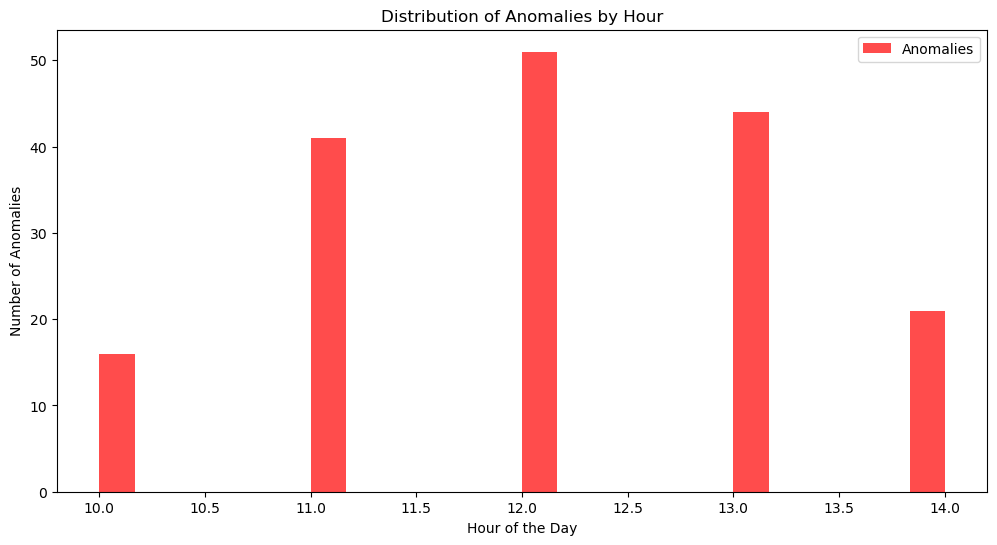

In [6]:
# For simplicity, let's look at the time of day when anomalies occur

anomalies['hour'] = anomalies.index.hour

plt.figure(figsize=(12, 6))
plt.hist(anomalies['hour'], bins=24, color='red', alpha=0.7, label='Anomalies')
plt.title('Distribution of Anomalies by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Anomalies')
plt.legend()
plt.show()

# Time Series Analysis

ADF Statistic: -5.348276230596643
p-value: 4.346058200441981e-06


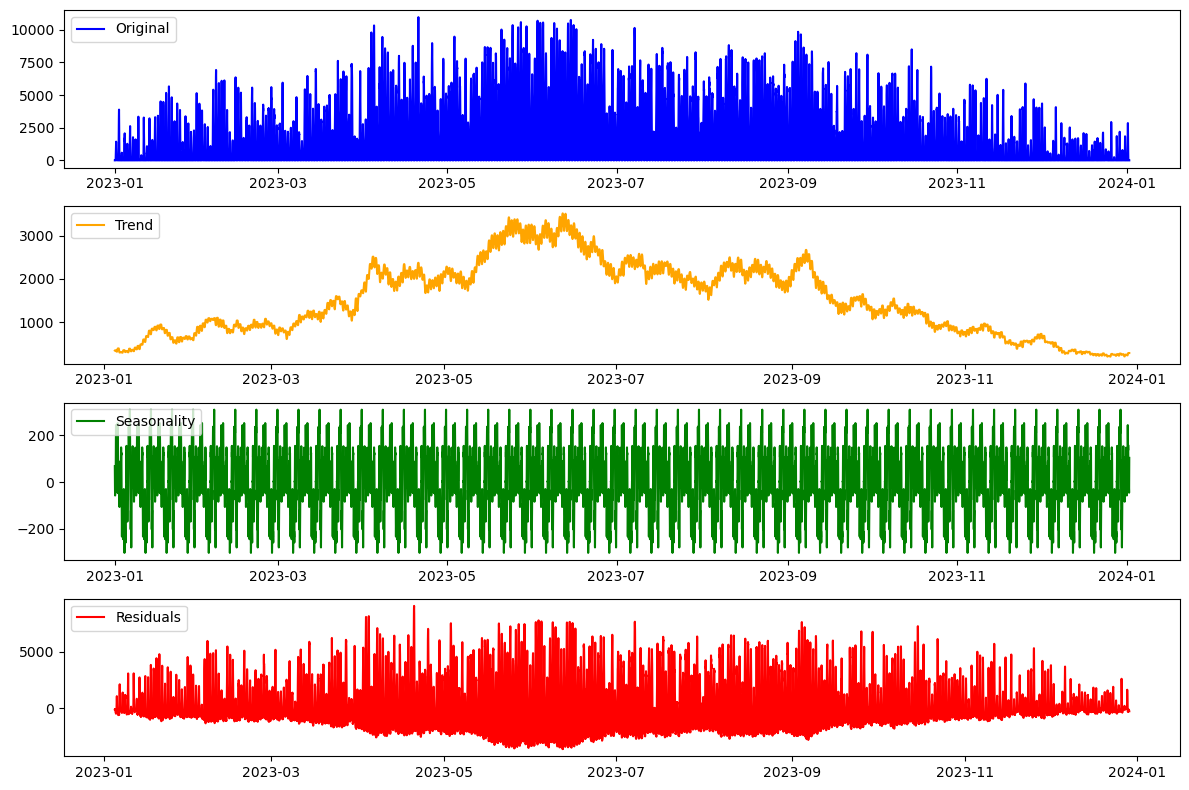

In [7]:
# Check for stationarity using ADF test
result = adfuller(generation)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Decompose the time series to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(generation, model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(generation, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ARIMA Model for Forecasting
### Train an ARIMA model for forecasting
#### Check for the best model to get forecast.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=6585.101, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6808.797, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6692.238, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=6583.102, Time=0.49 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=6672.736, Time=0.31 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=6585.101, Time=1.45 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=6619.965, Time=0.50 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=6587.044, Time=1.19 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=6646.709, Time=0.42 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=6577.555, Time=0.81 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=6672.808, Time=0.42 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=6579.555, Time=0.93 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=6579.555, Time=2.00 sec
 ARIMA(2,1,1)(1,1,0)[12]

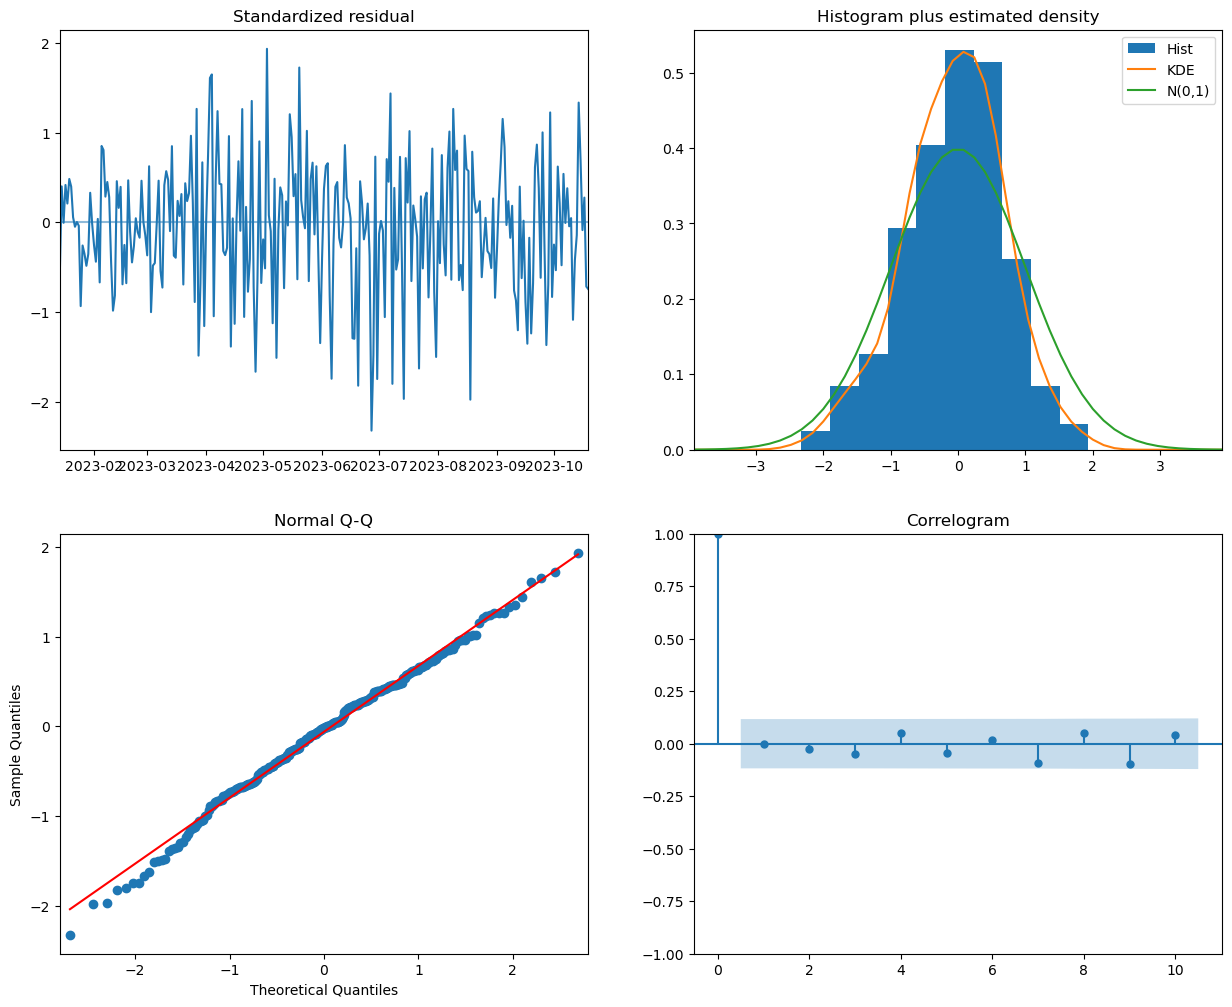

In [13]:
# Sort the dataframe by datetime
df.sort_index(inplace=True)

# Resample the data to daily frequency and fill missing values
daily_df = df['generation_mw'].resample('D').sum().fillna(method='ffill')

# Split the data into training and testing sets
train_size = int(len(daily_df) * 0.8)
train, test = daily_df.iloc[:train_size], daily_df.iloc[train_size:]

# Adjusting SARIMA order and adding seasonal component
model = SARIMAX(train, order=(5, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Using auto_arima for parameter selection
from pmdarima import auto_arima
model = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                   seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True)
results = model.fit(train)

# Plotting residuals for diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()


Mean Absolute Error: 19876.922951014792


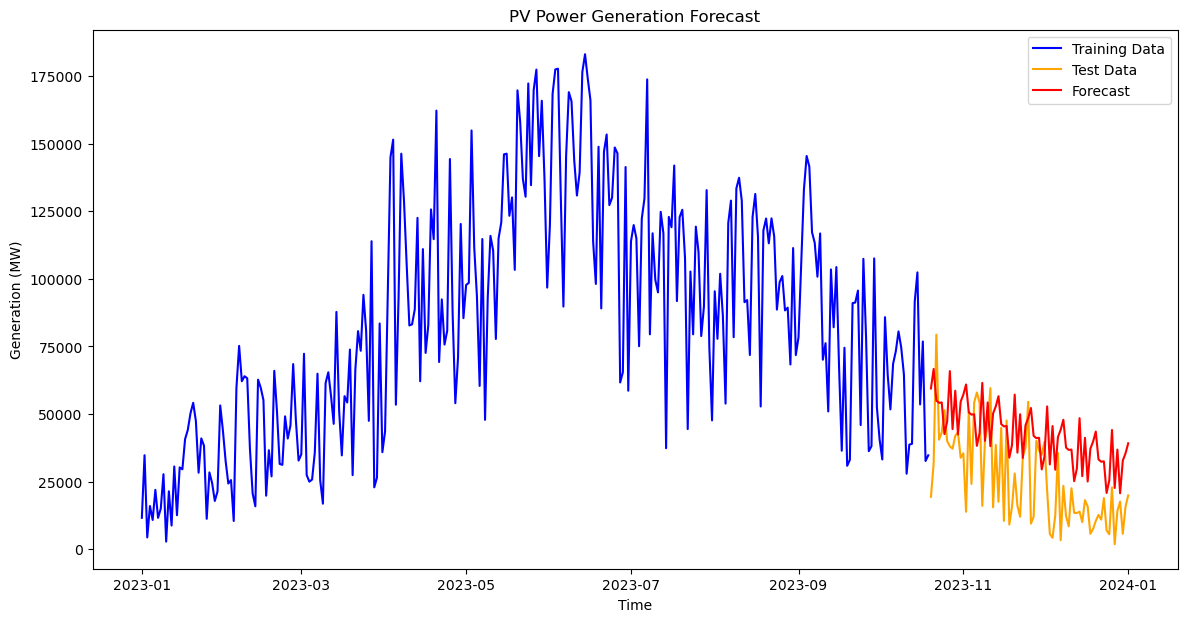

                                      SARIMAX Results                                       
Dep. Variable:                        generation_mw   No. Observations:                  292
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -3280.962
Date:                              Tue, 25 Jun 2024   AIC                           6571.924
Time:                                      15:17:09   BIC                           6590.080
Sample:                                  01-01-2023   HQIC                          6579.207
                                       - 10-19-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6948      0.104     -6.704      0.000      -0.898      -0.492
ma.L2         -0.19

In [14]:
# Since the best  model is ARIMA(0,1,3)(0,1,1)[12]
model = SARIMAX(train, order=(0, 1, 3), seasonal_order=(0, 1, 1, 12))
results = model.fit(disp=False)

forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
forecast_series = forecast.predicted_mean

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, forecast_series)
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, forecast_series, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.title('PV Power Generation Forecast')
plt.legend()
plt.show()

print(results.summary())

